In [32]:
%pylab inline

import pandas as pd
import geojson
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
import shapely.geometry as geom

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Let's load the VIIRS centiles dataset.

In [2]:
counties = pd.read_csv('data/bayes_viirs_centiles.csv')

For now, let's just look at a single month's worth of data – say, January 2015.

In [3]:
counties_jan_2015 = counties[(counties["year"] == 2015) & (counties["month"] == 1)]
counties_jan_2015.set_index("GEOID", inplace=True)

In [4]:
counties_jan_2015.head()

,year,month,sum,pct.0,pct.1,pct.2,pct.3,pct.4,pct.5,pct.6,...,pct.92,pct.93,pct.94,pct.95,pct.96,pct.97,pct.98,pct.99,pct.100,char
GEOID,,,,,,,,,,,,,,,,,,,,,
10001,2015,1,29994.766917,0.311258,0.402101,0.423164,0.437242,0.450412,0.461987,0.475499,...,8.606541,10.267921,12.364763,15.183322,18.613616,22.652377,30.753486,39.785943,104.381218,5
10003,2015,1,83803.569815,0.371193,0.517193,0.553226,0.589921,0.625723,0.661726,0.690361,...,34.291851,36.828442,40.042993,44.273496,48.898194,54.566767,63.634828,80.867041,221.455429,5
10005,2015,1,33622.508341,0.300052,0.388232,0.411015,0.430650,0.444303,0.458321,0.470549,...,5.402310,6.083416,6.905076,7.982741,9.759915,11.872270,15.336419,21.160101,62.423729,5
1001,2015,1,12265.871061,0.132351,0.210856,0.227608,0.238019,0.246427,0.254347,0.259957,...,2.746712,3.052393,3.527545,4.260455,5.486497,7.492242,10.747479,17.912148,137.692917,4
1003,2015,1,42417.992968,0.059485,0.161577,0.176453,0.185886,0.195110,0.201965,0.208223,...,4.599915,5.368496,6.246096,7.433799,9.126484,11.522981,15.202338,24.306215,114.295418,4


Let's try to figure out what this `sum` feature means exactly.

What are the counties with the highest "`sum`"?

In [14]:
counties_jan_2015.sort_values('sum', ascending=False)[:10]

,year,month,sum,pct.0,pct.1,pct.2,pct.3,pct.4,pct.5,pct.6,...,pct.92,pct.93,pct.94,pct.95,pct.96,pct.97,pct.98,pct.99,pct.100,char
GEOID,,,,,,,,,,,,,,,,,,,,,
2290,2015,1,6447121.291902,0.368831,0.547778,0.587114,0.618974,0.649363,0.679980,0.710734,...,2.137763,2.175502,2.221441,2.283771,2.373250,2.500844,2.668886,3.016308,47.300632,4
2185,2015,1,5983308.772381,0.984780,1.195192,1.234529,1.261440,1.281602,1.298134,1.312850,...,2.621329,2.672404,2.726674,2.787089,2.855471,2.941780,3.066919,3.521391,915.061462,4
2188,2015,1,2502009.859271,1.262065,1.657667,1.711645,1.750241,1.778757,1.801985,1.821886,...,2.514804,2.541722,2.572862,2.608643,2.652552,2.709009,2.791560,2.940658,87.644058,4
17031,2015,1,1122808.764947,3.290548,4.747416,5.598044,6.500326,7.451701,8.387699,9.390355,...,181.714188,187.174122,192.514169,198.951641,206.573322,217.028257,234.982036,261.550345,565.837219,5
2240,2015,1,1033640.511017,0.691974,0.989391,1.040067,1.072409,1.098691,1.120834,1.140289,...,1.828571,1.848034,1.870283,1.895258,1.926184,1.969319,2.043561,2.466713,71.165405,4
2180,2015,1,959673.849639,0.503118,0.701703,0.727093,0.744188,0.758924,0.772731,0.787087,...,1.870710,1.902605,1.934605,1.964705,1.992128,2.021386,2.067832,2.163585,40.582764,4
6037,2015,1,862957.692351,0.072532,0.157501,0.188446,0.207630,0.219077,0.228426,0.237242,...,54.316761,57.698040,61.566090,66.080414,71.839806,79.146645,90.478844,114.150539,467.639435,4
48201,2015,1,853758.196986,0.383562,0.691844,0.827261,0.964208,1.123763,1.281958,1.419821,...,87.986967,92.745249,98.717109,105.804179,113.679274,125.535592,142.516143,169.836955,418.676605,5
2261,2015,1,847877.278971,0.135744,0.300037,0.320786,0.335084,0.346881,0.357435,0.367345,...,1.351260,1.376314,1.404428,1.434142,1.467873,1.505816,1.553454,1.628119,82.512413,4


Looks like most of them are in Alaska (02 = AK). I guess the high latitude can explain that. Not counting the Alaska ones, the highest are 17031 (17 = IL, 031 = Cook County) and 6037 (06 = CA, 037 = Los Angeles County), which are also the two most populous counties in the United States!

Hey, that's interesting. So it looks like `sum` is a measure of total light area (rather than light density – in that case, New York and San Francisco would score more highly than Chicago and Los Angeles), and is a reasonably good proxy measure for population.

Let's try to plot light _area_ and light _density_ maps for an individual state – say, California.

First, let's load a GeoJSON file containing polygons corresponding to each county in the country (you can also try `us_counties_5m.json`, which has much finer resolution but at the cost of longer processing time).

In [5]:
with open("data/us_counties_500k.json") as json_file:
    counties_geo = geojson.loads(json_file.read().decode("ISO-8859-1"))

Let's construct a dictionary containing the polygons, light `sum` measurement, and area (just computed from the shape of the polygons themselves) for each county in California:

In [50]:
counties_to_plot = []
for county in counties_geo["features"]:
    if county["properties"]["STATE"] == '06': # California
        county_code = int(county["properties"]["STATE"] + county["properties"]["COUNTY"])
        light = counties_jan_2015.loc[county_code]['sum']
        polygon = county["geometry"]
        area = geom.shape(polygon).area
        
        polygons = []
        if polygon["type"] == 'MultiPolygon':
            for subpoly in polygon["coordinates"]:
                polygons.append({"type": "Polygon", "coordinates": subpoly})
        else:
            polygons.append(polygon)
            
        counties_to_plot.append({"polygons": polygons, "light": light, "area": area})

Alright, time to do some plotting!

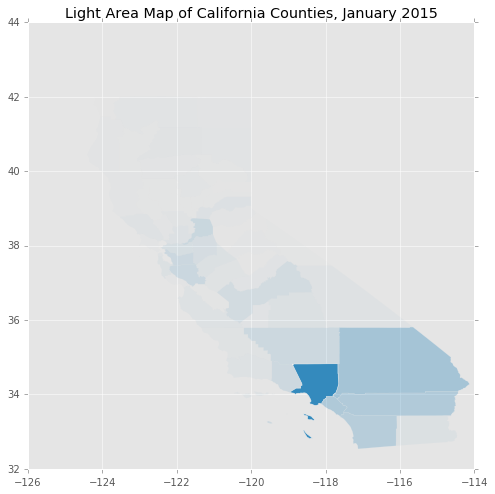

In [62]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

max_alpha = max(map(lambda c: c['light'], counties_to_plot))
for county in counties_to_plot:
    for poly in county["polygons"]:
        ax.add_patch(PolygonPatch(poly, alpha=county["light"] / max_alpha))
 
ax.set_title('Light Area Map of California Counties, January 2015')
_ = ax.axis('scaled')

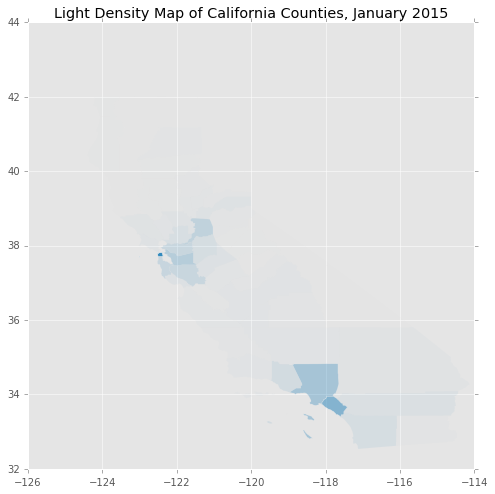

In [61]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

max_alpha = max(map(lambda c: c['light'] / c['area'], counties_to_plot))
for county in counties_to_plot:
    for poly in county["polygons"]:
        ax.add_patch(PolygonPatch(poly, alpha=(county["light"] / county["area"]) / max_alpha))
 
ax.set_title('Light Density Map of California Counties, January 2015')
_ = ax.axis('scaled')